## Weekly Mission : 내가 원하는 사이트 크롤링하기
### 필수과제: 사이트 1개를 선정해서 크롤링 및 시각화 작업  

다음 요청을 처리하고 업로드 해주세요.  

자신이 원하는 사이트 하나를 선정합니다.  

크롤링 하고자 하는 주제를 선정합니다. e.g.,신문기사 사이트 - 한가인에 대한 정보  

크롤링한 주제에 알맞는 시각화 방식을 고려하여 시각화 까지 진행합니다.  

<br><br>

## 보너스 과제 : 시각화 결과를 웹 페이지로 보여주기
크롤링한 사이트의 정보가 담긴 사이트를 제작해봅니다.  

이전 과제로 만들었던 나만의 사이트에 보여주는 방법도 고려해봄직 합니다.

------

### 00-1. 타겟설정:   
CGV 영화 예매율 Top3 영화의 리뷰 키워드 분포를 파악해 영화 추천을 받는다.!  

word cloud와 키워드 Top N 제시한다.  

### 00-2. 전략:  
1. CGV 무비차트에서 Top 3 영화에 들어가 
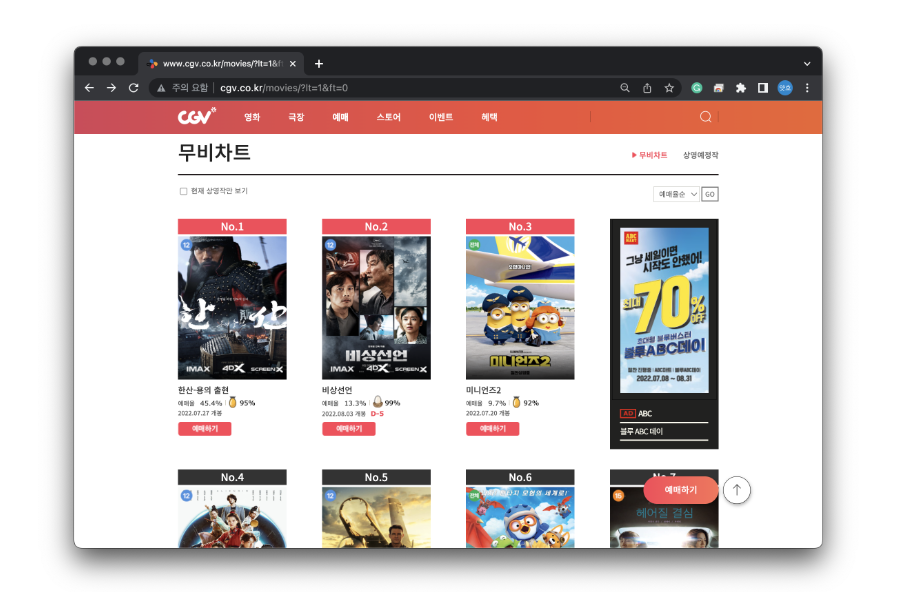
 

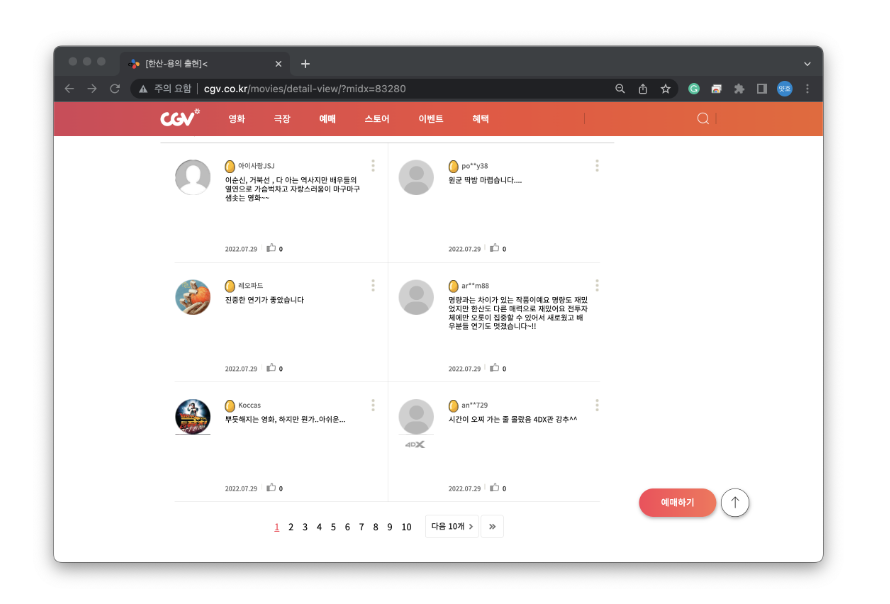

리뷰 스크래핑한다. 

2. 이때 영화 예매 차트에서 각 영화에 들어가, pagination에 접근하는 과정에서 마우스이벤트를 처리해야하므로  

    selenium 라이브러리가 적합할 것으로 판단한다.  
    
    
3. '개발자 도구 -검사' 진행하였을 때, 찾고자 하는 모든 타겟데이터들의 id가 randomized 하지는 않으므로, 태그 명시하는 방식의 스크래핑 진행할 수 있다.  

    그러나 grid 형태의 웹페이지이므로, 반복 진행 할 때 규칙성을 보이는 <u>XPath</u>이용한 구조 중심 스크래핑을 하면 원활한 스크래핑 가능할 것이다.  

     
4. Top 1 부터 단어 스크래핑을 세 번 반복한다.  

### 01. 라이브러리 불러오기 

In [10]:
# Web Scraping : Selenium
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver import ActionChains


# Visualization 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# frequency
from collections import Counter

# keyword
from konlpy.tag import Hannanum

#time-lag
import time

#User-Agent
UA= {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36"}


### 02. 데이터 수집
#### 02-1 이벤트 요청할 경로 
: <u>XPath</u>이용한 구조 중심 스크래핑을 한다.   

영화 예매율 Top 3의 상세페이지 (여기에 리뷰가 있음) url 상 query는 규칙을 파악하기 어렵다.
- http://www.cgv.co.kr/movies/detail-view/?midx=83280
- http://www.cgv.co.kr/movies/detail-view/?midx=85465
- http://www.cgv.co.kr/movies/detail-view/?midx=83127

이것이 영화 코드라면, 시기에 따라 이 query는 변경되어 매번 TOP3의 query를 변경해주어야 할 것이다.  

또한 이 웹페이지는 grid형태이므로 XPath에 규칙성이 있어, 명령을 반복수행하기 좋을 것이다. 

따라서 
1. 시기에 좌우 받지 않으며,
2. 규칙성이 명확한  

그 상위 페이지인 'CGV 무비차트'에서 Top 3 영화를 나타내는 '위치 (XPath)'를 클릭해 접근하는 방식을 선택한다.  

Top 3 영화의 XPath는  

 - Top1: `//*[@id="contents"]/div[1]/div[3]/ol[1]/li[1]/div[2]/a/strong`  
 
 - Top2: `//*[@id="contents"]/div[1]/div[3]/ol[1]/li[2]/div[2]/a/strong`  
 
 - Top3: `//*[@id="contents"]/div[1]/div[3]/ol[1]/li[3]/div[2]/a/strong`  
 
으로, `li` 태그의 index만 변경해 준다면 쉽게 접근 할 수 있을 것이다.  

#### 02-2. 영화 예매 순위에서 영화 상세 페이지로 이동 & 다시 예매 순위 페이지로 돌아오기

In [35]:
movie_chart= "http://www.cgv.co.kr/movies/?lt=1&ft=0"
movie_path= '//*[@id="contents"]/div[1]/div[3]/ol[1]/li[{}]/div[2]/a/strong'

driver= webdriver.Chrome(service= Service(ChromeDriverManager().install()))
driver.get(movie_chart)


for i in range(1,2): #TOP1 부터 3 까지 영화의 상세페이지 접근 
    movie_click= driver.find_elements(By.XPATH, '//*[@id="contents"]/div[1]/div[3]/ol[1]/li[{}]/div[2]/a/strong'.format(i))
    ActionChains(driver).click(movie_click).perform()


AttributeError: move_to requires a WebElement

<span style="color:red">**ERR!**</span>  

`AttributeError: move_to requires a WebElement`  

에러가 났다.   

`find_element**s**` 주의...

In [11]:
movie_chart= "http://www.cgv.co.kr/movies/?lt=1&ft=0"
movie_path= '//*[@id="contents"]/div[1]/div[3]/ol[1]/li[{}]/div[2]/a/strong'

In [ ]:
with webdriver.Chrome(service= Service(ChromeDriverManager().install())) as driver:
    driver.get(movie_chart)
    time.sleep(0.2)

    for i in range(1,4): #TOP1 부터 3 까지 영화의 상세페이지 접근 

        movie_click= driver.find_element(By.XPATH, movie_path.format(i))
        ActionChains(driver).click(movie_click).perform()
        driver.get(movie_chart)
        time.sleep(0.4)

#### 02-3. 영화 제목 및 상세페이지에서 데이터 크롤링 

리뷰 XPath:
- `//*[@id="liCommentFirst32983637"]/div[3]/p`
- `//*[@id="liCommentFirst32983635"]/div[3]/p`
- `//*[@id="liCommentFirst32983634"]/div[3]/p`

리뷰의 XPath를 확인해보면 규칙성은 있지만 숫자를 부여하기 어려우므로 태그 아이디를 찾는다.  

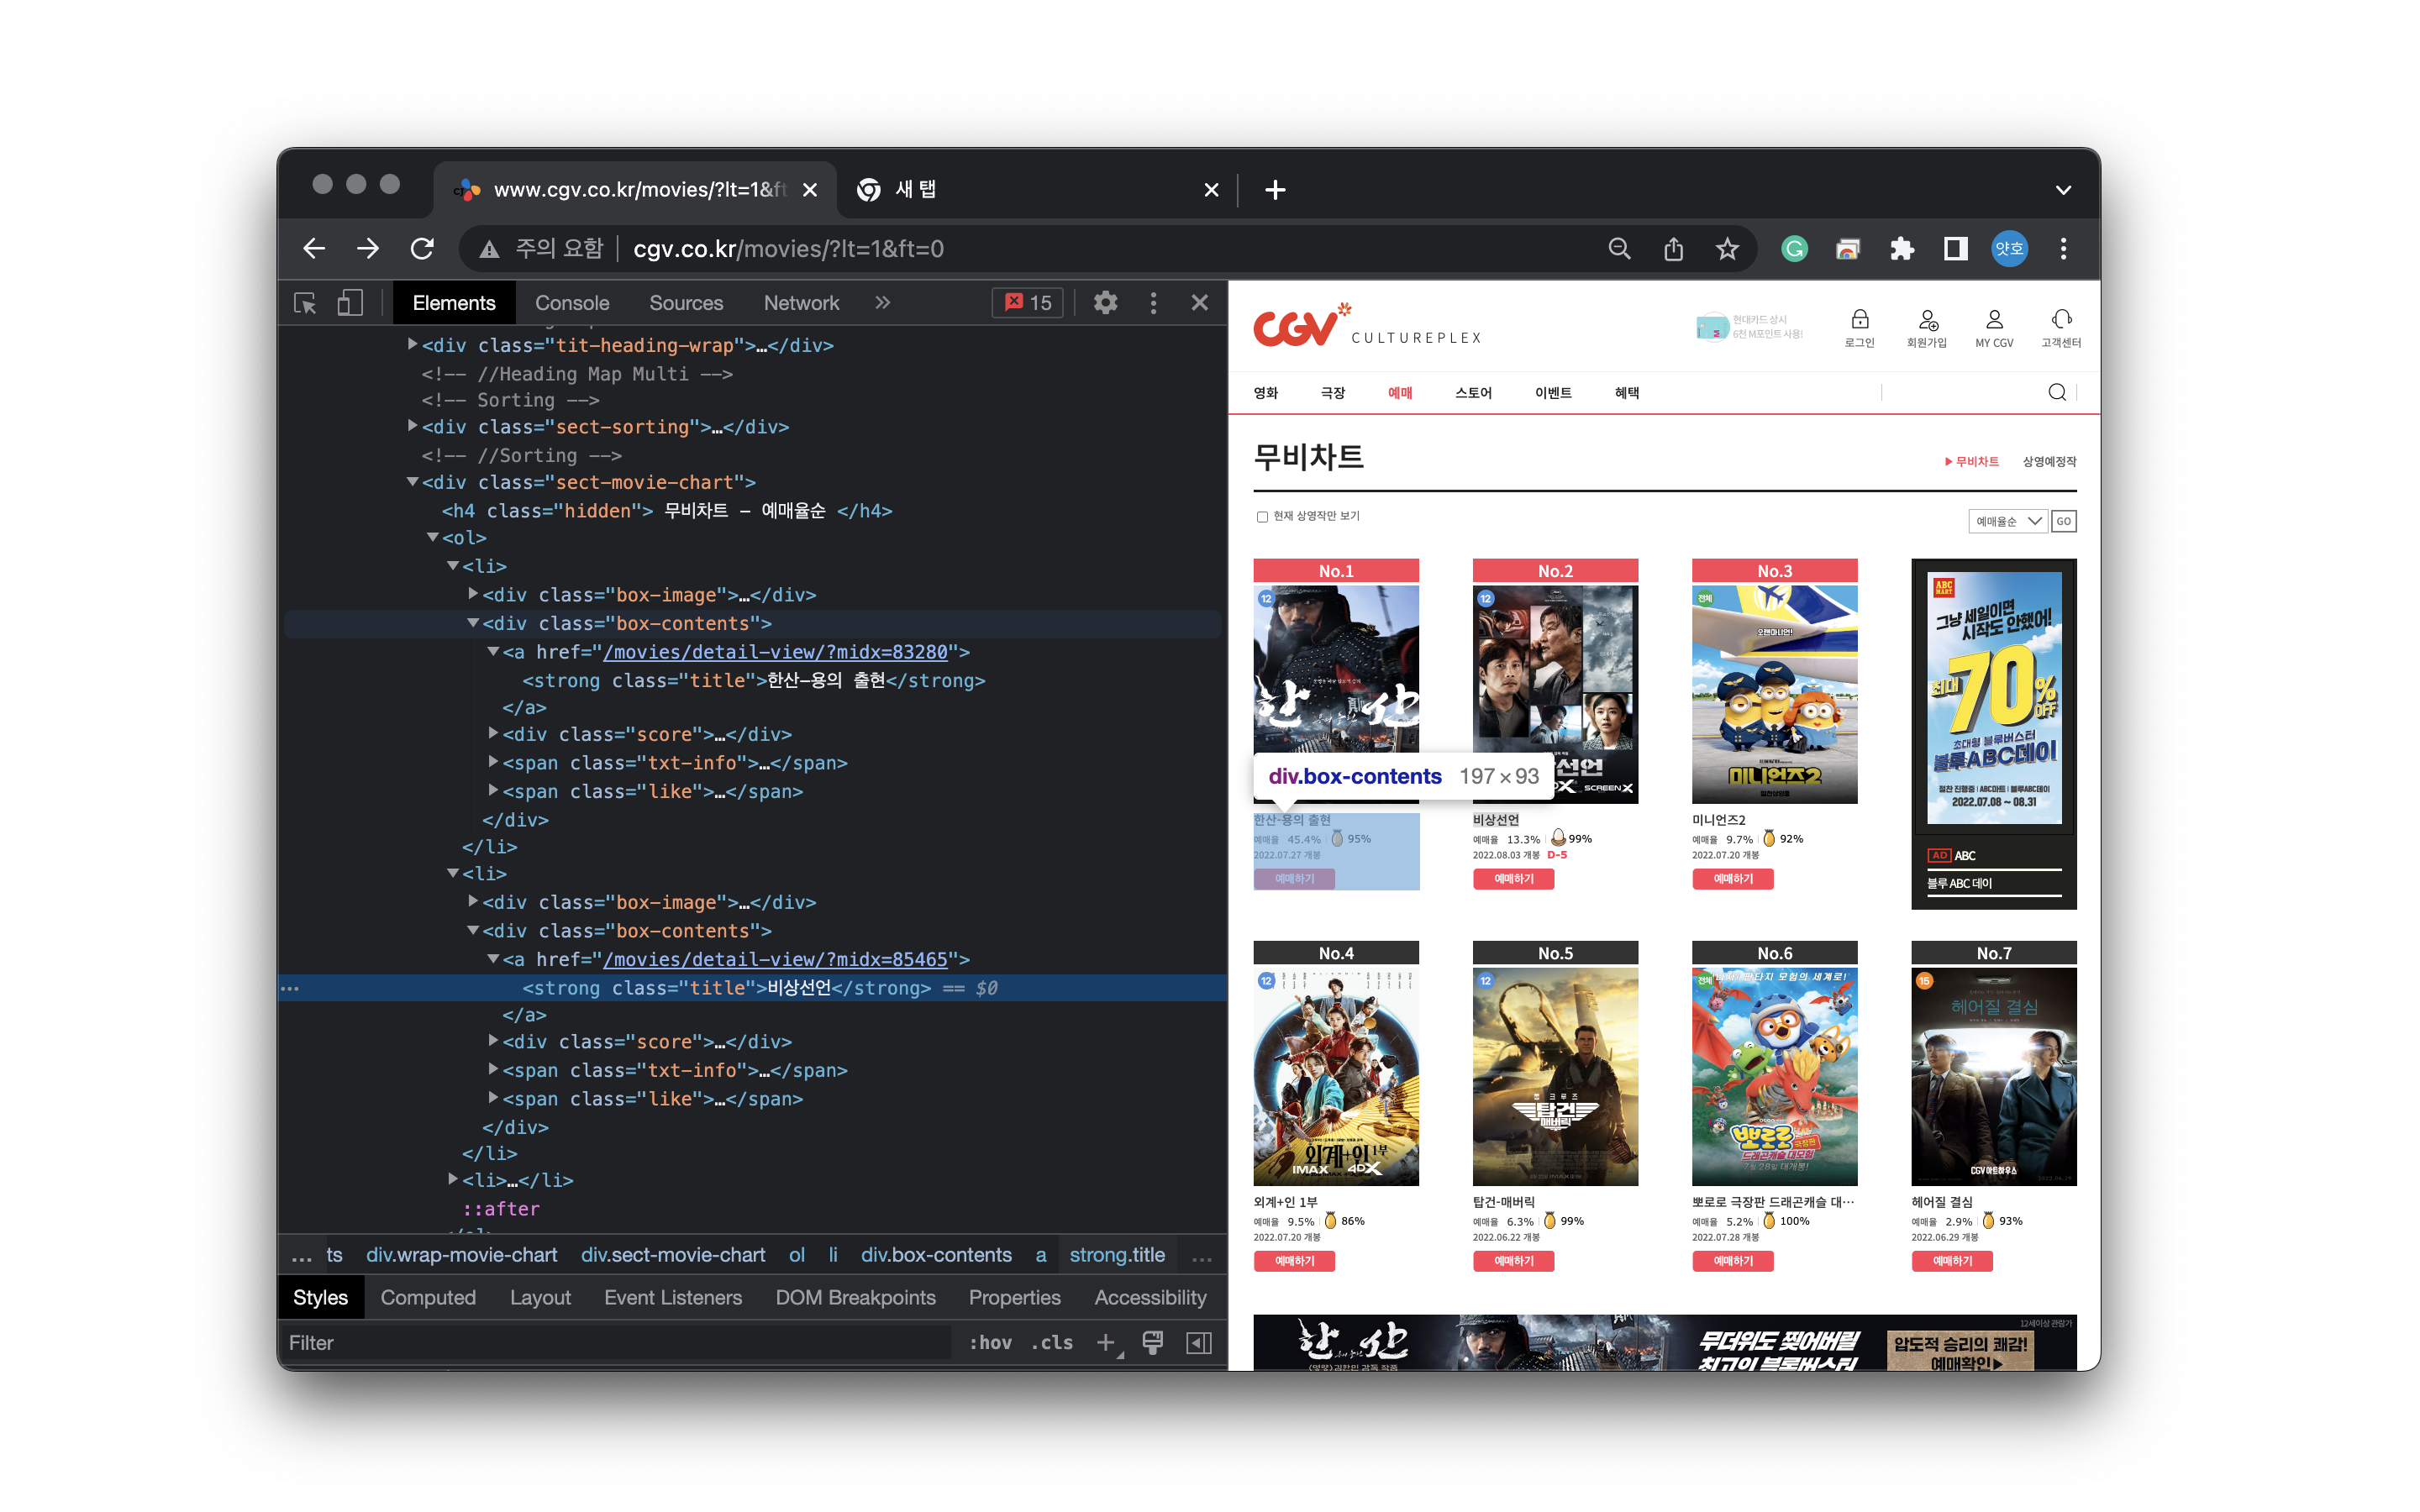

<span style="color:darkorange">box-comment</span> 태그를 찾으면 될 것 같다.  

리뷰의 pagenation은 

1. url의 쿼리를 변경해주는 방식 `http://www.cgv.co.kr/movies/detail-view/?midx=83280#{}` --> `.get()`
2. pagination 클릭해주는 방식 `//*[@id="paging_point"]/li[{}]/a` --> `ActionChains(click)`

이 있다. 

1번 방법을 이용해본다.  

현재 url을 얻어와 거기에 \#{}을 넣어준다. 


In [127]:
Top_movies={}

with webdriver.Chrome(service= Service(ChromeDriverManager().install())) as driver:
    driver.get(movie_chart)
    time.sleep(0.2)

    for i in range(1,2): #TOP1 부터 3 까지 영화의 상세페이지 접근 
        movie_click= driver.find_element(By.XPATH, movie_path.format(i))
        this_movie=movie_click.text

        ActionChains(driver).click(movie_click).perform()
        url_here= driver.current_url

        comments=[]
        for j in range(1,3): #리뷰 페이지 1~10페이지 스크랩  
            review_page=url_here + '#{}'
            print(review_page.format(j))
            driver.get(review_page.format(j))
            driver.get(review_page.format(j))            
            
            reviews= driver.find_elements(By.CLASS_NAME, "box-comment")

            for review in reviews:
                comments.append(review.text)
            
            time.sleep(1)    


        Top_movies[this_movie]=comments
        driver.get(movie_chart)
        time.sleep(0.4)

Top_movies        


http://www.cgv.co.kr/movies/detail-view/?midx=83280#1
http://www.cgv.co.kr/movies/detail-view/?midx=83280#2


{'한산-용의 출현': ['전투씬이 웅장합니다.',
  '초반 드라마 후반 액션이 탑건과 비슷한데 액션신이 아주 짜릿해요. 꼭 영화관에서 보세요!',
  '너무 재미났어요 Cg 실감나요',
  '명랑보다는 군더더기 없는 서사구조와 해전의 생생함을 만끽할 수 있는 필름',
  '거북선 개조 제데로해서 써먹네요',
  '재밌게 잘밧어요 스크린액스까진 필요없었을거같긴하지만 재미있게 잘보앗고 연기가 인상깊었습니다',
  '전투씬이 웅장합니다.',
  '초반 드라마 후반 액션이 탑건과 비슷한데 액션신이 아주 짜릿해요. 꼭 영화관에서 보세요!',
  '너무 재미났어요 Cg 실감나요',
  '명랑보다는 군더더기 없는 서사구조와 해전의 생생함을 만끽할 수 있는 필름',
  '거북선 개조 제데로해서 써먹네요',
  '재밌게 잘밧어요 스크린액스까진 필요없었을거같긴하지만 재미있게 잘보앗고 연기가 인상깊었습니다']}

<span style="color:red">**ERR! 2.**</span>  

\#{}에 따라 페이지가 넘어가야하는데 코드로는 잘 안된다.  

숫자는 올라가서 url은 바뀌는데 내용은 바뀌지 않는지, 같은 내용이 중복된다.  

다른 방법을 강구해본다. 

2번 방식으로 접근한다. 



In [12]:
page= '//*[@id="paging_point"]/li[{}]/a'
next10= '//*[@id="paging_point"]/li[11]/button'

start_page=1
end_page=20

Top_movies={}

with webdriver.Chrome(service= Service(ChromeDriverManager().install())) as driver:
    driver.get(movie_chart)
    time.sleep(0.3)

    for i in range(1,3+1): #TOP1 부터 3 까지 영화의 상세페이지 접근 
        movie_click= driver.find_element(By.XPATH, movie_path.format(i))
        this_movie=movie_click.text

        ActionChains(driver).click(movie_click).perform()
        url_here= driver.current_url

        comments=[]
        
        for j in range(start_page,end_page+1): #리뷰 페이지 1~10페이지 스크랩 
                
            reviews= driver.find_elements(By.CLASS_NAME, "box-comment")

            for review in reviews:
                comments.append(review.text)       
            
            
#             print('page:{}'.format(j))
            if j != end_page:
                if j < 10 :
                    next_page= driver.find_element(By.XPATH, page.format(j+1))
                    ActionChains(driver).click(next_page).perform()                 

                elif j%10 == 0 :
                    next_page_btn= driver.find_element(By.XPATH, next10)
                    ActionChains(driver).click(next_page_btn).perform()
                    time.sleep(0.3)
                else: # j>10
                    next_page= driver.find_element(By.XPATH, page.format(j%10+3))
                    ActionChains(driver).click(next_page).perform()   

            time.sleep(1)    


        Top_movies[this_movie]=comments
        driver.get(movie_chart)
        time.sleep(1)

# Top_movies        


만세만세 잘 된다.🕺🏻💃🏻  


<img src="Week4_WeeklyMission_log02-3.GIF" width="500">

<br><br>

### 03. 키워드 추출
#### 03-1. 단어 뽑기

In [13]:
han = Hannanum()

words={}
for movie in Top_movies:
    theMovie= Top_movies[movie]
    words[movie] =[]
    for word in theMovie:
        if len(han.nouns(word)) > 1:  #종종 뽑히는 무의미한 단어, 조사, 등 필터링
            words[movie] += han.nouns(word)

# print(words)

#### 03-2. 추출 단어의 빈도수 

In [14]:
keyword={}

for movie in words:
    thewords= words[movie]
    keyword[movie]={}

    for word in thewords:
        keyword[movie]= Counter(thewords)


#### 03-2-1. 키워드 필터링

In [15]:

exception_words=['미니언','미니언즈','한산','배우','배우들','비상선언','진짜','영화']

for movie in keyword:
    thekeyword= keyword[movie]

    for key in thekeyword:
        if len(key) <= 1: # 가끔 걸리는 조사, 무의미 단어 필터링
            keyword[movie][key]=0
            break
        for e in exception_words:
            if key == e:
                keyword[movie][key]=0
    

#### 03-2-2. 키워드 Top10

In [16]:
keyword10={}
for movie in keyword:
    thekeyword= keyword[movie]
    
    keyword10[movie]={}
    for word in thekeyword:
        keyword10[movie]= Counter(thekeyword).most_common(10)
print(keyword10)

{'한산-용의 출현': [('영화', 19), ('연기', 11), ('한산', 10), ('명량', 8), ('국뽕', 7), ('거북선', 7), ('이순신', 7), ('수', 6), ('배우들', 6), ('진짜', 5)], '비상선언': [('영화', 37), ('연기', 23), ('것', 12), ('비행기', 12), ('배우들', 11), ('긴장감', 10), ('진짜', 10), ('연출', 7), ('추천', 6), ('감동', 6)], '외계+인 1부': [('영화', 27), ('2부', 14), ('2편', 10), ('연기', 9), ('기대', 9), ('스토리', 8), ('외계+', 7), ('1부', 7), ('배우들', 6), ('재밌', 6)]}


### 04. Word Cloud 생성

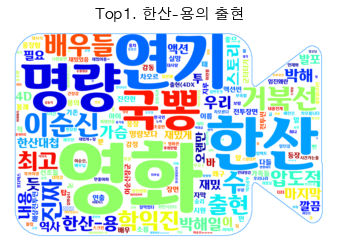

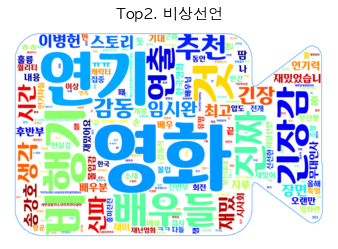

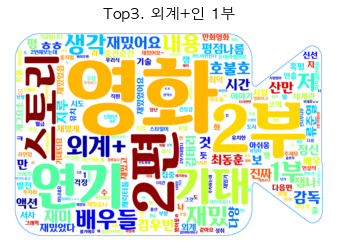

In [17]:
from PIL import Image
import numpy as np

import matplotlib
from matplotlib import rc 

matplotlib.rcParams['font.family'] ='AppleGothic'
matplotlib.rcParams['axes.unicode_minus'] =False

# read the mask image
H_mask = np.array(Image.open("movie_mask.png"))

# make cloud
top=1
for movie in keyword:
    cloud= WordCloud(font_path="/Users/jiwookim/Downloads/BinggraeⅡ-Bold.otf",
                    mask= H_mask,
                    background_color="white", colormap="jet",
                    contour_color="dodgerblue", contour_width= 2,
                    width=2000, height=2000, scale=3)


    img= cloud.generate_from_frequencies(keyword[movie])
    plt.title('Top{}. '.format(top) + movie, fontsize=15)
    
    plt.axis("off")

    plt.imshow(img,interpolation='bilinear')
    plt.show()
    top += 1

In [32]:
import time
now= time.localtime()
KST="%04d/%02d/%02d %02d:%02d" % (now.tm_year, now.tm_mon, now.tm_mday, now.tm_hour, now.tm_min)

/Users/jiwookim/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/jiwookim/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/jiwookim/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

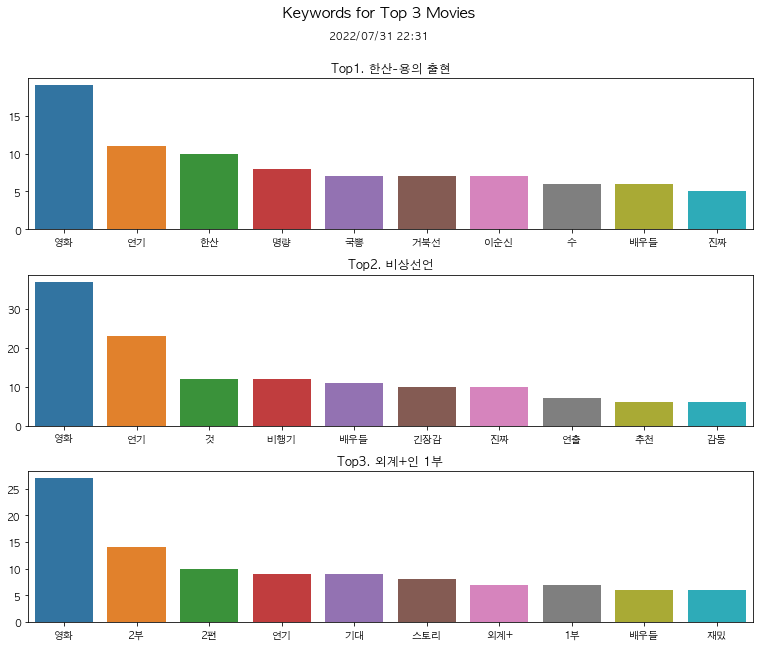

In [69]:

x=[]
y=[]
rank=1
fig=plt.figure(figsize=(13,10))
fig.suptitle("Keywords for Top 3 Movies", fontsize=15)
fig.text(0.5,0.94,KST, va='center',ha='center')
for movie in keyword10:
    for key in range(len(keyword10[movie])):
        x.append(keyword10[movie][key][0])
        y.append(keyword10[movie][key][1])
    plt.subplot(3,1,rank)
    plt.subplots_adjust(hspace = 0.3)
    
    sns.barplot(x,y)
    plt.title("Top{}. {}".format(rank, movie))
#     plt.text(0,0,KST, horizontalalignment='right',verticalalignment='top',transform=ax.transAxes)
    
    x=[]
    y=[]
    rank +=1